```{contents}
```

# Performance Metrics

A **Decision Tree Classifier** is evaluated just like any other classification model. The tree itself is trained using cost functions like **Gini** or **Entropy**, but when it comes to **model performance**, we rely on standard **classification metrics**:

---

## Key Performance Metrics for DTC

### 1. **Accuracy**

* Measures the proportion of correct predictions out of all predictions.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

* Good when classes are balanced, but misleading in imbalanced datasets.

---

### 2. **Confusion Matrix**

* A table that shows counts of:

  * **TP** (True Positives)
  * **TN** (True Negatives)
  * **FP** (False Positives)
  * **FN** (False Negatives)
* Helps understand *where* the classifier makes mistakes.

---

### 3. **Precision**

* Of the samples the model predicted as positive, how many are actually positive?

$$
Precision = \frac{TP}{TP + FP}
$$

* Important when the cost of false positives is high (e.g., spam detection).

---

### 4. **Recall (Sensitivity / TPR)**

* Of the actual positives, how many did the model correctly identify?

$$
Recall = \frac{TP}{TP + FN}
$$

* Important when the cost of false negatives is high (e.g., medical diagnosis).

---

### 5. **F1-Score**

* Harmonic mean of precision and recall:

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

* Useful when dataset is imbalanced.

---

### 6. **ROC Curve & AUC**

* ROC = trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** at different thresholds.
* **AUC (Area Under Curve)** closer to 1 = better model.

---

### 7. **Log Loss / Cross-Entropy Loss**

* Measures uncertainty in predictions by penalizing false confident predictions.
* Useful if you use `predict_proba` instead of hard class labels.

---

### 8. **Cohen’s Kappa**

* Compares model accuracy against random chance.
* Good when class imbalance exists.

---

**In summary**:

* For **balanced datasets** → Accuracy, Precision, Recall, F1 are good enough.
* For **imbalanced datasets** → Prefer **F1-score, ROC-AUC, and Cohen’s Kappa**.
* For **probabilistic outputs** → Log Loss is useful.



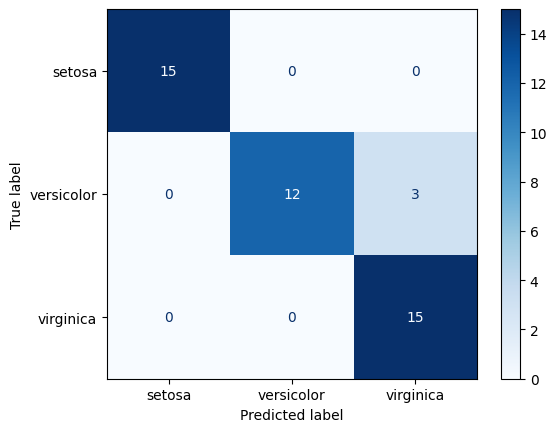

0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

nan


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize for ROC-AUC (multiclass)
y_bin = label_binarize(y, classes=np.unique(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# ROC-AUC (macro-average for multiclass)
auc = roc_auc_score(y_bin[y_test], y_proba, multi_class="ovr")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.show()

print(acc)
print(report)
print(auc)